In [60]:
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [61]:
path = os.path.abspath('.\\kaggle_givemesomecredit_train.csv')

List of all the variables in the training dataset:

Dependent variable:
- output

Independent (10) variables:
- age
- credit_balance
- 1monplus_dlqin_freq (30-59 days)
- 2monplus_dlqin_freq (60-89 days)
- 3monplus_dlqin_freq (90 days or more)
- debt_ratio
- income
- num_credit_lines
- num_realestate_loans
- num_dependents

In [62]:
df = pd.read_csv(path)
df = df.dropna(axis=0)

In [63]:
df.head()

,id,output,age,credit_balance,1monplus_dlqin_freq,2monplus_dlqin_freq,3monplus_dlqin_freq,debt_ratio,income,num_credit_lines,num_realestate_loans,dependents
0,1,1,45,0.766127,2,0,0,0.802982,9120.0,13,6,2.0
1,2,0,40,0.957151,0,0,0,0.121876,2600.0,4,0,1.0
2,3,0,38,0.658180,1,0,1,0.085113,3042.0,2,0,0.0
3,4,0,30,0.233810,0,0,0,0.036050,3300.0,5,0,0.0
4,5,0,49,0.907239,1,0,0,0.024926,63588.0,7,1,0.0


In [64]:
df = df.drop('id', axis = 1)

In [65]:
f, ax = plt.subplots(figsize=(10, 8))
corr = df.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)

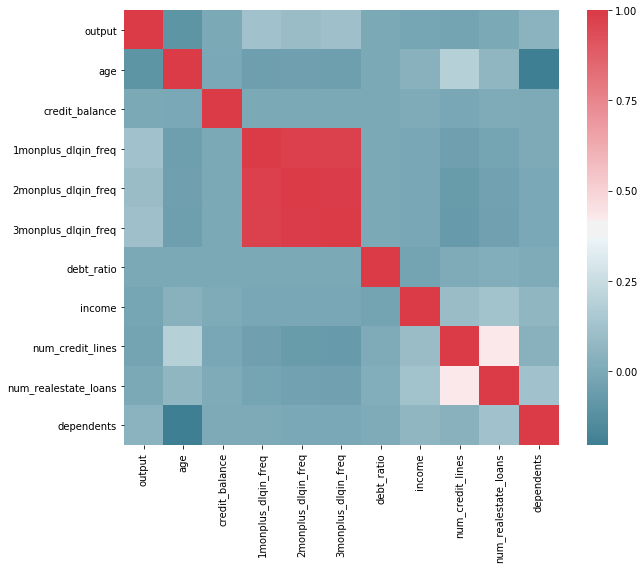

In [66]:
plt.show()

It can be seen from the above correlation plot that output is negatively correlated with age; it is positively correlated with one, two, and three month delinquency frequencies and number of dependents.

In [67]:
X=df.iloc[:, [1, 10]].values

In [70]:
df.shape
from sklearn.decomposition import FactorAnalysis
#factor = FactorAnalysis(n_components=4, random_state=101).fit(X)

In [85]:
#print(pd.DataFrame(factor.components_,columns=list(X)))

0 -14.385522  0.237816 


1   0.008396  0.507859

Only two factors are significant

In [72]:
g = sns.pairplot(df, size=3,vars=["1monplus_dlqin_freq", "2monplus_dlqin_freq"],kind="reg")

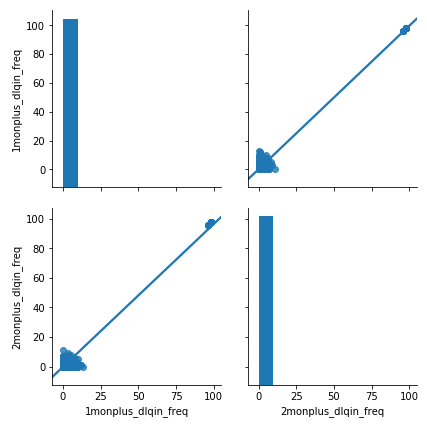

In [73]:
plt.show()

There is a linear relationship between these time span variables as confirmed here and also looks like we have outliers 

In [74]:
#df=df.take(np.random.permutation(len(df))[:20000])
X_sample=df.iloc[:, [1, 10]].values

In [75]:
y = df.iloc[:, 0].values

In [76]:
df.head()

,output,age,credit_balance,1monplus_dlqin_freq,2monplus_dlqin_freq,3monplus_dlqin_freq,debt_ratio,income,num_credit_lines,num_realestate_loans,dependents
0,1,45,0.766127,2,0,0,0.802982,9120.0,13,6,2.0
1,0,40,0.957151,0,0,0,0.121876,2600.0,4,0,1.0
2,0,38,0.658180,1,0,1,0.085113,3042.0,2,0,0.0
3,0,30,0.233810,0,0,0,0.036050,3300.0,5,0,0.0
4,0,49,0.907239,1,0,0,0.024926,63588.0,7,1,0.0


In [102]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_sample, y, test_size = 0.25, random_state = 0)

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 500, criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [103]:
y_pred = classifier.predict(X_test)

In [104]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

In [105]:
cm

array([[27952,     6],
       [ 2109,     1]], dtype=int64)

In [81]:
(cm[0][0]+cm[0][1])/(cm[0][0]+cm[0][1]+cm[1][0]+cm[1][1])

0.9298257283490754

In [107]:
from sklearn import metrics
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred, pos_label=1)
metrics.auc(fpr, tpr)

0.50012966301178241

RF with 500 trees gives a poor performance as only one true positive and many false negatives. Lets now try another ensemble model adaboost.

In [82]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
bdt = AdaBoostClassifier(DecisionTreeClassifier(max_depth=1),algorithm="SAMME",n_estimators=200)
bdt.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=1,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
          learning_rate=1.0, n_estimators=200, random_state=None)

In [99]:
y_pred=bdt.predict(X_test)

In [100]:
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
cm

array([[27958,     0],
       [ 2110,     0]], dtype=int64)

Lets see how a single linear model SVC performs

In [108]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=0, shrinking=True,
  tol=0.001, verbose=False)

In [109]:
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
cm

array([[27958,     0],
       [ 2110,     0]], dtype=int64)

In [110]:
from sklearn import metrics
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred, pos_label=1)
metrics.auc(fpr, tpr)

0.5